In [0]:
# References for some part of code mentioned in the solution

In [0]:
# Library imports
import torch
import torchvision
import numpy as np
from time import time
from torch import optim,nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

In [0]:
# Parameters
batch_size = 64
random_seed = 10
torch.manual_seed(random_seed)
torch.backends.cudnn.enabled = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [0]:
# Training module
def train(optimiser, model, criterion, epochs=15):
    losses = list()
    start_time = time()
    
    # Initializing weights
    input_size = 28*28
    output_size = 10
    hidden_sizes = [128, 64]
    grad_history = dict()
    
    for t in range(epochs):
        batch_loss = 0
        for images, labels in train_loader:
            # (28x28) vector for MNIST images
            images = images.to(device)
            labels = labels.to(device)
            flat_images = images.view(images.shape[0], -1)
            
            # prediction
            y_pred = model(flat_images)
            # y_pred = model(images)
            
            # loss calculation
            loss = criterion(y_pred, labels)

            # Putting gradients as zero
            optimiser.zero_grad(model)
        
            # This is where the model learns by backpropagating
            loss.backward()

            # And optimizes its weights here
            optimiser.step(model)
        
            batch_loss += loss.item()
            
        # Collecting losses after every epoch
        losses.append(batch_loss / len(train_loader))
        print ('Epoch: {} - Loss: {}'.format(t, batch_loss / len(train_loader)))
        
    print("\nTraining Time (in min) :",(time() - start_time) / 60)
    return [list(range(epochs)), losses]

In [0]:
# plotting loss
def lossPlot(x, y):
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.plot(x,y)
    plt.show()

In [0]:
# Validation (returns Accuracy)
def validate(test_loader, model):
    match, counter = 0, 0
    for images, labels in test_loader:
        for i in range(len(labels)):
            images = images.to(device)
            labels = labels.to(device)

            # flatten the image
            image = images[i].view(1, 28*28)
            
            # Turn off gradients and evaluating model
            model.eval()
            with torch.no_grad():
                log_p = model(image)

        # Converting log propbabilities into probabilities by exponentiatiation
        prob = torch.exp(log_p)
        pred_label = prob.argmax()
        target_label = labels.cpu().numpy()[i]
        
        if(target_label == pred_label):
            match += 1
        counter += 1

    return (match/counter)

In [0]:
def train_test_bench(optimiser, model, criterion, epochs=20):
  # Performs training and testing of various cases in question 
  # (Train and Test loaders are defined by the time this function is called)
  x, y = train(optimiser, model.to(device), criterion, epochs=epochs)
  lossPlot(x, y)
  print ('Accuracy: {}'.format(validate(test_loader, model.to(device))*100))


In [12]:
# (1a) Data download and preparation 
# i. Normalization (image = (image - mean) / std)
# ii. Tensor convertion into matrix (batch_size X 1 X 28 X 28)

# Defining Tranformer (mean=0.5, std=0.5)
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

# Downloading dataset (similar to cifar10 tutorial)
train_set = datasets.MNIST('\.', transform=transform, download=True, train=True)
test_set = datasets.MNIST('\.', transform=transform, download=True, train=False)

# Loading dataset in batches
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

Extracting \./MNIST/raw/train-images-idx3-ubyte.gz to \./MNIST/raw


Extracting \./MNIST/raw/train-labels-idx1-ubyte.gz to \./MNIST/raw


Extracting \./MNIST/raw/t10k-images-idx3-ubyte.gz to \./MNIST/raw




Extracting \./MNIST/raw/t10k-labels-idx1-ubyte.gz to \./MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
# (1b) Shallow (3-layered NN with RelU, LogMax outer layer and NLL loss)

# Model Instantiation
def Model():
  inp_size = 28*28
  out_size = 10
  hidden_sizes = [128, 128]
  return nn.Sequential(nn.Linear(inp_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], out_size),
                        nn.LogSoftmax(dim=1))

# Loss function
criterion = nn.NLLLoss()

Epoch: 0 - Loss: 0.31887171895249183
Epoch: 1 - Loss: 0.1986935280604975
Epoch: 2 - Loss: 0.16769449208289194
Epoch: 3 - Loss: 0.14960433450589047
Epoch: 4 - Loss: 0.1365131800736128
Epoch: 5 - Loss: 0.12646079680193334
Epoch: 6 - Loss: 0.1186271504417602
Epoch: 7 - Loss: 0.1121753414473268
Epoch: 8 - Loss: 0.10649682864594434
Epoch: 9 - Loss: 0.10161784629839887
Epoch: 10 - Loss: 0.09737011433632643
Epoch: 11 - Loss: 0.09352278886938781
Epoch: 12 - Loss: 0.09006675696576327
Epoch: 13 - Loss: 0.08693062890170099
Epoch: 14 - Loss: 0.08402212935168224
Epoch: 15 - Loss: 0.08143230961925631
Epoch: 16 - Loss: 0.0788464300564802
Epoch: 17 - Loss: 0.07661633422451296
Epoch: 18 - Loss: 0.07453083236024642
Epoch: 19 - Loss: 0.07243893913098617
Epoch: 20 - Loss: 0.07071597218862984
Epoch: 21 - Loss: 0.06868636770757722
Epoch: 22 - Loss: 0.06715562585185268
Epoch: 23 - Loss: 0.0655141413124449
Epoch: 24 - Loss: 0.0639624330959817
Epoch: 25 - Loss: 0.06269930944299457
Epoch: 26 - Loss: 0.061284509

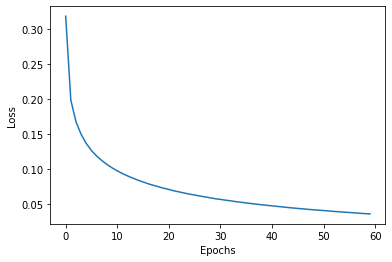

Accuracy: 98.08917197452229


In [14]:
# (1c) Adagrad
class Adagrad:
    def __init__(self, lr=0.0001):
        self.grad_hist = dict()
        self.lr = lr
        
    def step(self, model):
        # Iterating layer by layer through parameters
        lr = self.lr
        for name, param in model.named_parameters():
            if param.requires_grad:
              # Updating parameters that require gradient 
              if name not in self.grad_hist:
                  self.grad_hist[name] = torch.ones(param.data.shape)*1e-10
                  
              self.grad_hist[name] += param.grad**2
              param.data -= lr * (param.grad / (self.grad_hist[name]**0.5))
                
        return 

    def zero_grad(self, model):
      for name, param in model.named_parameters():
        if param.requires_grad:
          param.grad = torch.zeros(param.data.shape)

# Training and Testing
train_test_bench(Adagrad(lr=0.003), Model(), criterion, epochs=60)

Epoch: 0 - Loss: 0.25182052786702286
Epoch: 1 - Loss: 0.10711744863754397
Epoch: 2 - Loss: 0.08131757017566578
Epoch: 3 - Loss: 0.0636136912857927
Epoch: 4 - Loss: 0.05324005272223561
Epoch: 5 - Loss: 0.0444906819810364
Epoch: 6 - Loss: 0.03767745964515057
Epoch: 7 - Loss: 0.03244245451674469
Epoch: 8 - Loss: 0.029601891235168428
Epoch: 9 - Loss: 0.02475789017173082
Epoch: 10 - Loss: 0.023705648065709482
Epoch: 11 - Loss: 0.020989325356238812
Epoch: 12 - Loss: 0.019178161301266854
Epoch: 13 - Loss: 0.020394445760354304
Epoch: 14 - Loss: 0.014638377047741591
Epoch: 15 - Loss: 0.014465270266095712
Epoch: 16 - Loss: 0.016951999778964562
Epoch: 17 - Loss: 0.012168011489087966
Epoch: 18 - Loss: 0.014296045894228192
Epoch: 19 - Loss: 0.012868995851735825

Training Time (in min) : 2.8288537740707396


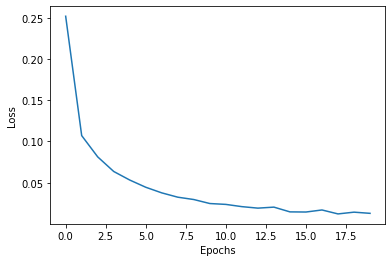

Accuracy: 98.72611464968153


In [15]:
# (1d) RMSprop
class RMSprop:
    def __init__(self, lr):
      self.lr = lr
      self.beta = 0.999
      self.grad_hist = dict()
        
    def step(self, model):
      # Iterating layer by layer through parameters
      lr = self.lr
      for name, param in model.named_parameters():
          if param.requires_grad:
            # Updating parameters that require gradient 
            if name not in self.grad_hist:
              self.grad_hist[name] = (1-self.beta)*(param.grad**2) + torch.ones(param.data.shape)*1e-10
            else:
              self.grad_hist[name] = self.beta*self.grad_hist[name] + (1 - self.beta)*(param.grad**2)
                
            param.data -= lr * (param.grad / (self.grad_hist[name]**0.5))
              
      return

    def zero_grad(self, model):
      for name, param in model.named_parameters():
        if param.requires_grad:
          param.grad = torch.zeros(param.data.shape)

# Training and Testing
train_test_bench(RMSprop(lr=0.001), Model(), criterion, epochs=20)

Epoch: 0 - Loss: 0.23980263404564053
Epoch: 1 - Loss: 0.1045267880757226
Epoch: 2 - Loss: 0.07800178084649574
Epoch: 3 - Loss: 0.061444381557738605
Epoch: 4 - Loss: 0.05176451606854701
Epoch: 5 - Loss: 0.044935427169238075
Epoch: 6 - Loss: 0.03599596721952213
Epoch: 7 - Loss: 0.030678946189264627
Epoch: 8 - Loss: 0.02720343153069872
Epoch: 9 - Loss: 0.021392039851402676
Epoch: 10 - Loss: 0.021155219014757858
Epoch: 11 - Loss: 0.018973127760584834
Epoch: 12 - Loss: 0.0170646253635666
Epoch: 13 - Loss: 0.015477967699731527
Epoch: 14 - Loss: 0.01450743766249354
Epoch: 15 - Loss: 0.012479565387814124
Epoch: 16 - Loss: 0.012935392983527834
Epoch: 17 - Loss: 0.011896860794718267
Epoch: 18 - Loss: 0.01292438989878495
Epoch: 19 - Loss: 0.012219650332561768

Training Time (in min) : 2.9326669216156005


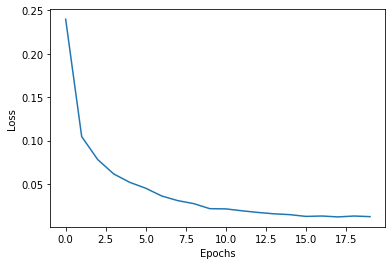

Accuracy: 99.36305732484077


In [26]:
# (1e) Adam
class Adam:
    def __init__(self, lr=0.0001):
      self.lr = lr
      self.beta_1 = 0.9
      self.beta_2 = 0.999
      self.grad_hist = dict()
      self.momentum = dict()
        
    def step(self, model):
        # Iterating layer by layer through parameters
        lr = self.lr
        for name, param in model.named_parameters():
          if param.requires_grad:
              # Updating parameters that require gradient 
              if name not in self.momentum:
                self.momentum[name] = self.beta_1*param.grad
              else:
                self.momentum[name] = self.beta_1*self.momentum[name] + (1 - self.beta_1)*param.grad

              if name not in self.grad_hist:
                self.grad_hist[name] = (1-self.beta_2)*(param.grad**2) + torch.ones(param.data.shape)*1e-10
              else:
                self.grad_hist[name] = self.beta_2*self.grad_hist[name] + (1 - self.beta_2)*(param.grad**2)

              param.data -= lr * (self.momentum[name] / (self.grad_hist[name]**0.5))
              
        return

    def zero_grad(self, model):
      for name, param in model.named_parameters():
        if param.requires_grad:
          param.grad = torch.zeros(param.data.shape)

# Training and Testing
train_test_bench(Adam(lr=0.0003), Model(), criterion, epochs=10)

Epoch: 0 - Loss: 0.5216630940387117
Epoch: 1 - Loss: 0.19751454721183093
Epoch: 2 - Loss: 0.14552405468229926
Epoch: 3 - Loss: 0.11638133924629197
Epoch: 4 - Loss: 0.09645171381080392
Epoch: 5 - Loss: 0.07937530481588168
Epoch: 6 - Loss: 0.06801522769399289
Epoch: 7 - Loss: 0.05946998712398223
Epoch: 8 - Loss: 0.05183189349380066
Epoch: 9 - Loss: 0.04535746955469664

Training Time (in min) : 1.8721476117769877


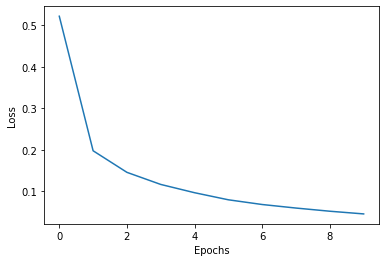

Accuracy: 98.08917197452229


In [27]:
# (2b i) Deep (8-layered NN with RelU, LogMax outer layer and NLL loss)

# Model Instantiation
def Model_E():
  inp_size = 28*28
  out_size = 10
  hidden_sizes = [128, 64, 64, 64, 64, 64, 64, 64]
  return nn.Sequential(nn.Linear(inp_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[3], hidden_sizes[4]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[4], hidden_sizes[5]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[5], hidden_sizes[6]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[6], hidden_sizes[7]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[7], out_size),
                        nn.LogSoftmax(dim=1))

# Training and Testing
train_test_bench(Adam(lr=0.0003), Model_E(), criterion, epochs=10)

Epoch: 0 - Loss: 0.3201908120420823
Epoch: 1 - Loss: 0.141896012574752
Epoch: 2 - Loss: 0.10976071387275195
Epoch: 3 - Loss: 0.09486191099021099
Epoch: 4 - Loss: 0.07975459416140752
Epoch: 5 - Loss: 0.06954954677362686
Epoch: 6 - Loss: 0.06439569012931129
Epoch: 7 - Loss: 0.05383598698930604
Epoch: 8 - Loss: 0.04656068077767645
Epoch: 9 - Loss: 0.04565304763484071

Training Time (in min) : 2.108139940102895


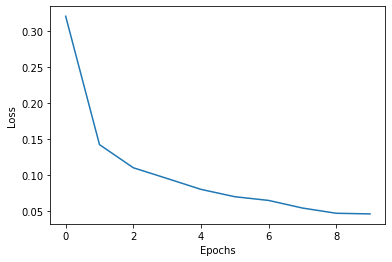

Accuracy: 98.72611464968153


In [28]:
# (2b ii) Batch Normalization in certain layers

# Model Instantiation
def Model_BN():
  inp_size = 28*28
  out_size = 10
  hidden_sizes = [128, 64, 64, 64, 64, 64, 64, 64]
  return nn.Sequential(nn.Linear(inp_size, hidden_sizes[0]),
                        nn.BatchNorm1d(hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                        nn.BatchNorm1d(hidden_sizes[2]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[3], hidden_sizes[4]),
                        nn.BatchNorm1d(hidden_sizes[4]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[4], hidden_sizes[5]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[5], hidden_sizes[6]),
                        nn.BatchNorm1d(hidden_sizes[6]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[6], hidden_sizes[7]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[7], out_size),
                        nn.LogSoftmax(dim=1))

# Training and Testing
train_test_bench(Adam(lr=0.0003), Model_BN(), criterion, epochs=10)

Epoch: 0 - Loss: 0.8833653584027341
Epoch: 1 - Loss: 0.3685777135479298
Epoch: 2 - Loss: 0.2620535519625396
Epoch: 3 - Loss: 0.211883502470246
Epoch: 4 - Loss: 0.17840507041925052
Epoch: 5 - Loss: 0.15318048226116882
Epoch: 6 - Loss: 0.13721359640296335
Epoch: 7 - Loss: 0.12256534138261509
Epoch: 8 - Loss: 0.105291901233751
Epoch: 9 - Loss: 0.09501625749983512

Training Time (in min) : 2.018958604335785


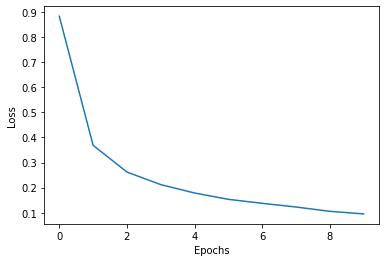

Accuracy: 98.72611464968153


In [45]:
# (2c) Dropout in certain layers

# Model Instantiation
def Model_DP(dropout=0.5):
  inp_size = 28*28
  out_size = 10
  hidden_sizes = [128, 64, 64, 64, 64, 64, 64, 64]
  return nn.Sequential(nn.Linear(inp_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[3], hidden_sizes[4]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[4], hidden_sizes[5]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[5], hidden_sizes[6]),
                        nn.Dropout(dropout),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[6], hidden_sizes[7]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[7], out_size),
                        nn.LogSoftmax(dim=1))

# Training and Testing
train_test_bench(Adam(lr=0.0003), Model_DP(dropout=0.5), criterion, epochs=10)